In [ ]:
# 일일 이력 판매 데이터가 제공됩니다. 작업은 테스트 세트에 대해 모든 상점에서 판매 된 총 제품 수를 예측하는 것입니다. 
# 상점 및 제품 목록은 매달 약간 씩 변경됩니다. 이러한 상황을 처리 할 수있는 강력한 모델을 만드는 것은 어려운 일 중 하나입니다.

# 파일 설명
# sales_train.csv- 훈련 세트. 2013 년 1 월부터 2015 년 10 월까지의 일일 내역 데이터.
# test.csv- 테스트 세트 2015 년 11 월에 이러한 상점 및 제품의 판매량을 예측해야합니다.
# sample_submission.csv- 올바른 형식의 샘플 제출 파일
# items.csv- 품목 / 제품에 대한 보충 정보.
# item_categories.csv-   항목 카테고리에 대한 보충 정보.
# shops.csv- 상점에 대한 보충 정보.

# 데이터 필드
# ID-  테스트 세트 내의 (Shop, Item) 튜플을 나타내는 ID
# shop_id- 상점의 고유 식별자
# item_id- 제품의 고유 식별자
# item_category_id- 상품 카테고리의 고유 식별자
# item_cnt_day- 판매 된 제품 수 이 수치의 월별 금액을 예측하고 있습니다.
# item_price- 상품의 현재 가격
# 날짜  -dd / mm / yyyy 형식의 날짜
# date_block_num- 편의를 위해 연속 월 번호. 2013 년 1 월은 0, 2013 년 2 월은 1, ..., 2015 년 10 월은 33
# item_name-  아이템 이름
# shop_name- 상점 이름
# item_category_name- 상품 카테고리 이름



# 몇월달에 어떤상품이 어디 상점에서 많이 팔렸는지,,,!!!!!!!!!
# 많이 팔린 상품의 매장 가격 비교 (같은 상품 저렴하게 팔았는지)

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [3]:
# 엑셀파일 받아오기
item_categories = pd.read_csv("item_categories.csv")
items = pd.read_csv("items.csv") 
train = pd.read_csv("sales_train_v2.csv")
sample_submission = pd.read_csv("sample_submission.csv")
shops = pd.read_csv("shops.csv")
test = pd.read_csv("test.csv")

In [4]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [6]:
train.head(30)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [7]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
# 60개 상점
format(shops.shape)

'(60, 2)'

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [11]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [13]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [12]:
# 테이블 join
train_merge = pd.merge(train, items, on="item_id", how="left")
train_merge = pd.merge(train_merge, item_categories, on="item_category_id", how="left")
train_merge = pd.merge(train_merge, shops, on="shop_id", how="left")
train_merge.head(500)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""


In [12]:
# null값 확인
null=train_merge.isnull().sum()
print(null)

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64


In [13]:
# date_block_num- 편의를 위해 연속 월 번호. 2013 년 1 월은 0, 2013 년 2 월은 1, ..., 2015 년 10 월은 33
# date_block_num 의 값의 범위를 확인,  0~33    34개월 간의 판매량
# item_cnt_day 값이 groupby sum을 통해 월간 판매량
train_merge_groupby = train_merge.groupby("date_block_num").sum() 
train_merge_groupby.head(50)

,shop_id,item_id,item_price,item_cnt_day,item_category_id
date_block_num,,,,,
0,3417068,1183971787,8.221187e+07,131479.0,4574740
1,3111582,1076043980,7.558019e+07,128090.0,4319172
2,4016457,1220911622,8.429831e+07,147142.0,4777604
3,3164978,971345965,6.151282e+07,107190.0,3804157
4,3093999,950372988,5.727413e+07,106970.0,3694879
5,3364700,1047351238,6.334361e+07,125381.0,4033579
6,3376156,1067060380,6.219681e+07,116966.0,4088854
7,3510787,1065970958,6.543817e+07,125291.0,4146799
8,3208314,957871641,7.270157e+07,133332.0,3731098


[Text(0, 0.5, 'item_cnt_day'), Text(0.5, 0, 'date_block_num')]

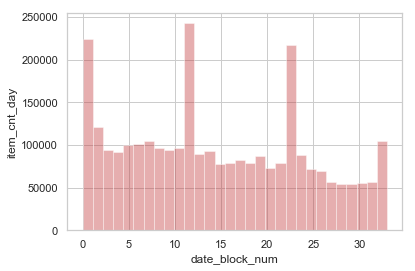

In [46]:
# 2013년 1월 ~ 2015년 10월 까지의 월별 판매된 제품 수 
# 어떤 달이 매출이 높은지 확인
sns.set(style = 'whitegrid',
       palette = 'RdBu')
sns.distplot(train['date_block_num'],
             norm_hist = False,
             kde = False,
             bins = 30).set(xlabel = 'date_block_num', ylabel = 'item_cnt_day')

In [53]:
# 날짜데이터를 여러 특성으로 나누기
# dataframe = pd.DataFrame()
# dataframe['date'] = pd.date_range('2019-11-19', periods=150, freq='w')
# dataframe['year'] = dataframe['date'].dt.year
# print(dataframe['year'])

train_merge['date'] = pd.to_datetime(train_merge['date'], format='%d-%m-%Y', errors='ignore')
train_merge['year'] = train_merge['date'].dt.year
train_merge['month'] = train_merge['date'].dt.month

train_merge.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,month,year
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1,2013
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",1,2013


In [78]:
##### 매출없는 상점 찾기 ######
grouped = train_merge.groupby('shop_id').sum()

# 'sequence' 열(by='sequence')을 기준으로 index(axis=0) 오름차순 정렬하기
# personnel_df.sort_values(by=['sequence'], axis=0)

# 내림차순(descending)으로 정렬하기 : ascending=False
# personnel_df.sort_values(by=['sequence'], axis=0, ascending=False)

grouped = grouped.sort_values(by=['item_cnt_day'], axis=0, ascending=False)
# print(grouped)  
# shop_id 31 상점이 매출 가장 좋음

# 매출없는 상점 제외
grouped = grouped[(grouped['item_cnt_day'] > 0)]
format(grouped.shape)

# 매출없는 상점 없음,,,


'(60, 7)'

In [69]:
# 매장별 월별 매출
grouped = train_merge.groupby(['date_block_num', 'shop_id'])
grouped.sum()

item_id    item_price  item_cnt_day  \
date_block_num shop_id                                         
0              0        50791835  2.546339e+06        5578.0   
               1        28789014  1.378736e+06        2947.0   
               2        10025040  1.028861e+06        1146.0   
               3         6867501  5.500130e+05         767.0   
               4        17507849  1.330204e+06        2114.0   
               6        31742677  2.459155e+06        3686.0   
               7        22332160  1.706554e+06        2495.0   
               8        13864194  9.024955e+05        1463.0   
               10        7923206  5.484440e+05         935.0   
               12        6402517  9.429697e+05         842.0   
               13       13532313  2.089200e+05        1178.0   
               14       14914651  1.174789e+06        1777.0   
               15       21991347  1.809658e+06        2724.0   
               16       28329364  1.886488e+06        2978.0   
               18       23589062  2.364609e+06        2856.0   
               19       27013448  1.947331e+06        3038.0   
               21       14965579  7.982260e+05        1495.0   
               22       15096736  1.200870e+06        1924.0   
               23       17222661  1.255818e+06        1948.0   
               24       15276512  1.316556e+06        1768.0   
               25       76438897  4.685009e+06        8215.0   
               26       21822015  1.457946e+06        2331.0   
               27       47540922  4.003307e+06        5548.0   
               28       64185085  3.967652e+06        7057.0   
               29       25879900  1.956896e+06        2820.0   
               30       28888460  1.832778e+06        2978.0   
               31       93377912  5.359620e+06       10173.0   
               32       11219472  7.885802e+05        1238.0   
               35       18621262  1.375525e+06        2127.0   
               37       22618791  1.513640e+06        2399.0   
...                          ...           ...           ...   
33             20       13563669  1.239048e+06        2611.0   
               21       17770318  2.006097e+06        1912.0   
               22       11136211  1.228006e+06        1336.0   
               24        9990857  1.493692e+06        1227.0   
               25       52713434  5.301322e+06        6247.0   
               26       11635272  1.413624e+06        1409.0   
               28       27517262  2.866024e+06        3018.0   
               31       57281732  4.686812e+06        6112.0   
               34        3441659  5.957786e+05         383.0   
               35       12863432  1.619729e+06        1418.0   
               36        3427780  3.568190e+05         330.0   
               37        6245477  1.010353e+06         833.0   
               38        9691071  1.438691e+06        1110.0   
               39        7843493  1.046676e+06         997.0   
               41        6957197  9.892120e+05         742.0   
               42       33962885  3.812131e+06        4491.0   
               44        8443643  7.111640e+05         779.0   
               45        6659169  7.343207e+05         702.0   
               46       12155734  1.531588e+06        1320.0   
               47       15422288  2.053209e+06        1776.0   
               48       10420375  1.195557e+06        1111.0   
               49        6754058  6.912610e+05         648.0   
               50        8941925  1.266217e+06         949.0   
               52        8537659  8.548380e+05         847.0   
               53       10033683  1.051156e+06        1061.0   
               55       10026458  1.032017e+06        1972.0   
               56       13488268  1.269425e+06        1263.0   
               57       22883880  2.224367e+06        2316.0   
               58       14767199  1.609430e+06        1446.0   
               59        7232848  8.232262e+05         79

In [84]:
# 상품 카테고리별 가장 많이 팔린 상품 카테고리 (인기 상품 카테고리!!!) 
grouped = train_merge.groupby('item_category_id').sum()
grouped = grouped.sort_values(by=['item_cnt_day'], axis=0, ascending=False)
# grouped
# 40번 item_category_id가 가장 인기상품

grouped = train_merge.groupby(['date_block_num', 'item_category_id'])['item_cnt_day']
grouped.sum()

date_block_num  item_category_id
0               0                       1.0
                1                       1.0
                2                    1390.0
                3                     440.0
                4                     251.0
                5                     623.0
                6                     870.0
                9                     149.0
                11                    375.0
                13                     84.0
                14                    143.0
                15                    268.0
                18                      3.0
                19                   8983.0
                21                   3492.0
                22                   1286.0
                23                   4150.0
                25                    641.0
                28                   5435.0
                29                    308.0
                30                  22216.0
                33                    291.0